# Lab 5: The Photoelectric Effect

Kollin Schultz, Justin Houle

# Abstract
For this Pion Muon Positron lab we ran two separate experiments. For these experiments we were expected to measure and calculate the mass of a Pion and a Muon as well as the lifetime of a Muon. To calculate the mass of the particles we analyzed pictures of the visible routes of Pions Muons and Positrons in a hydrogen bubble chamber. The bubble chamber was invented by Donald A. Glaser in the mid 50's. It is a chamber that is filled with superheated transparent liquid (usually liquid hydrogen). Glaser earned the Nobel Prize in Physics in 1960 for this invention. Using the bubble chamber photographs and measurements, we inputed out measurments in jupyter notebook to achieve a Pion mass of 146.6 MeV/c<sup>2</sup> and a Muon mass of 109.9 MeV/c<sup>2</sup>. Both of our values were within a 5% error of the accepted values. While we were measuring the length and curvature of the particle paths another experiment ran a scintillator. This device kept track of the number of muons that entered and measured the decay rate of those muons. This devices works in such a way that incoming particles strick a luminescent material which absorbs the impact energy.  


# Introduction
In our Pi-Mu-e experiment we analyzed bubble tracks that were created by high energy particles. First a pion particle would enter the hydrogen bubble chamber with an initial momentum. As the original pion particle slows and eventually comes to a stop it decays into a muon (and non charged neutrons) which splits into a different path. Eventually the muon itself with decay in a positron which is sent off into different, spiraled path. By measuring these different paths and calculating momentums and energies we can find the mass of the original Pion and Muon particles. 
Pions and muons have an extremely short lifetime, and we used a scintillator to measure these lifetimes over a few trials that last 8 hours at a time. The device measured over a million interactions but only a small fraction of those interactions were viable for our experiement to determine the lifetime of a muon. 


# Methods

To estimate the value of Planck's constant (h) using the photoelectric effect, a Photoelectric Effect Apparatus (Daedalon Corporation), a Mercury Arc Power Supply (Daedalon Corporation), a mercury arc (Daedalon Corporation), a DC Regulated Power Supply (Tenma), a Stefan-Boltzman Lamp (Pasco Scientific), a multimeter (MIC-7S), and light filters were used. The light from a lamp was directed through a filter to create monochromatic radiation. The monochromatic radiation then enters the Photoelectric Effect Apparatus where the stopping potential of is measured by slowly increasing the voltage. This was repeated with blue, green, and red filters a total of 15 times per filter. The recorded data has been plotted (figure 2) and analyzed in the results and analysis section. ![Figure 1](/lab05_setup_ks_jh.jpg)

# Results and Analysis

Our experiment measured the stopping voltage (V) required to negate the photoelectric effect of three separate wavelengths of light . The average V was plotted with the energy of each separate wavelength. A trendline was fitted to the graph and the slope of the line was used to calculate Planck's constant (h). Using the equation: \begin{equation} e(V+\phi)=hc/\lambda \end{equation} 
Where: 
\begin{equation}
e=electronic charge 
\end{equation}
\begin{equation}
\phi= the workfunction 
\end{equation}
\begin{equation}
c= the speed of light
\end{equation}
\begin{equation}
\lambda= wavelength 
\end{equation}
From this equations we find that: 
\begin{equation} slope=V\lambda \end{equation} 
Which allows us to calculate h using: 
\begin{equation} h=(slope*e)/c \end{equation}
Our data resulted in a calculation of h=5.735x10<sup>-34</sup> J s. With an accepted value of 6.626x10<sup>-34</sup> J s, our value had a 13.45% error. 

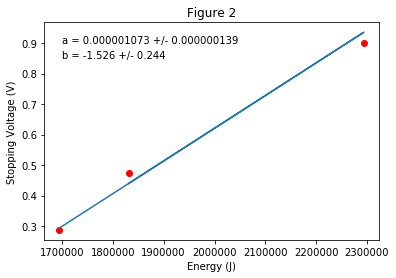

In [48]:
#Imported software with analysis and plotting functions.
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii
from scipy.optimize import curve_fit

data=ascii.read('lab05_data_ks_jh.csv')

#Imported data from csv file, and used numpy to average the values.
g=(np.mean(data[0][:]))
gsig=np.std(data[0][:])
xg=(1/(546*10**-9))
b=np.mean(data['blue'])
bsig=np.std(data['blue'])
xb=(1/(436*10**-9))
r=np.mean(data['red'])
rsig=np.std(data['red'])
xr=(1/(590*10**-9))

#Included x and y values into sets including standard deviations.
x=(xr, xb, xg)
y=(r, b, g)
ysig=(rsig, bsig, gsig)

#Defined function form for the trendline.
def func (x, a, b):
    return a*x + b

popt, pcov=curve_fit(func, x, y, sigma=ysig)

#Formatted the plot for visual representation.
plt.plot(x, y, 'ro')
plt.plot(x, np.polyval(popt, x), '-')
plt.text(1700000, 0.9, r"a = {0:.9f} +/- {1:.9f}".format(popt[0], pcov[0,0]**0.5))
plt.text(1700000, 0.85, r"b = {0:.3f} +/- {1:.3f}".format(popt[1], pcov[1,1]**0.5))
plt.title('Figure 2')
plt.ylabel('Stopping Voltage (V)')
plt.xlabel('Energy (J)')
plt.show()

In [49]:
#Imported software with analysis and plotting functions.
import numpy as np

#Defined Variables for use in formula.
e=1.602*10**-19
c=2.998*10**8
slope=popt[0]

#Calculated h using the slope from the above graph.
h=((slope*e)/c)
print(h)

5.73501387274e-34


# Conclusion

Our analysis accurately determined the muon mass to be 109.9 eV/c<sup>2</sup>, which is only a 3.75% error from the accepted value. This value, however, does not account for any uncertainty. Since our data set came from multiple lab teams/reports we are unable to calculate exact values for an uncertainty. By using the same data as every other lab group, we were able to collaborate with others to determine the accuracy of our calculation. The muon lifetime value we calculated as 8.3 microseconds. Although there is not an accepted value for there lifetime, an estimated value of 7.05 microseconds was used which assumes the muons were traveling at 0.95c. With this estimated value our caluation resulted in a 18.2% error. The detector only collected data for one day, so if we had been able to increase the number of data points, then we may have been able to reduce the percent error on our calculation.

# Acknowledgements



We would like to thank Dr. Ribaudo for his assistance with the curve fitting to our data.